C:\Users\fikri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\fikri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\fikri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


       tanggal  pm25  co  Prediksi ISPU Kategori ISPU
0   01/12/2021   100  13      86.760563        Sedang
1   02/12/2021    56   7      27.674500          Baik
2   03/12/2021    71   9      58.698675        Sedang
3   04/12/2021    65  13      66.646904        Sedang
4   05/12/2021    80  17      86.760563        Sedang
5   06/12/2021    91  23      93.936346        Sedang
6   07/12/2021    58  12      57.060062        Sedang
7   08/12/2021    76  17      82.198344        Sedang
8   09/12/2021    63  11      62.429102        Sedang
9   10/12/2021    73  14      76.410711        Sedang
10  11/12/2021    60   8      44.915074          Baik
11  12/12/2021    63  17      67.161583        Sedang
12  13/12/2021    68  11      68.196658        Sedang
13  14/12/2021    76  15      81.075550        Sedang
14  15/12/2021   124  19     109.631019   Tidak Sehat
15  16/12/2021   136  20     108.852259   Tidak Sehat
16  17/12/2021    81  18      87.907223        Sedang
17  18/12/2021    69  18    

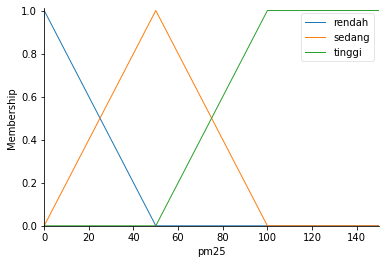

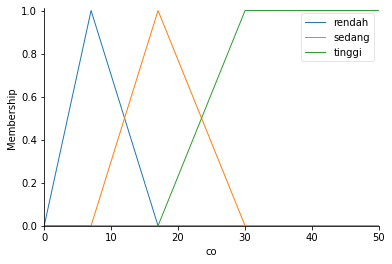

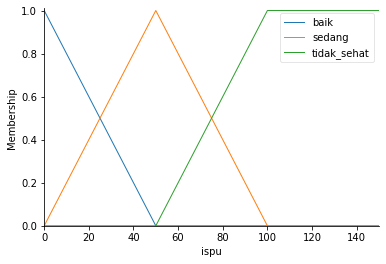

In [1]:
#Import Lib
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#Membaca data dari file Excel ke dalam data frame
data = pd.read_csv('tubes_ai.csv',sep = ';')  # Ganti 'data_input.xlsx' dengan nama file Excel Anda

#Membuat FIS dengan metode Tsukamoto
# Fuzzy variables
pm25 = ctrl.Antecedent(np.arange(0, 151, 1), 'pm25')
co = ctrl.Antecedent(np.arange(0, 51, 1), 'co')
ispu = ctrl.Consequent(np.arange(0, 151, 1), 'ispu')

# Fuzzy membership functions
pm25['rendah'] = fuzz.trimf(pm25.universe, [0, 0, 50])
pm25['sedang'] = fuzz.trimf(pm25.universe, [0, 50, 100])
pm25['tinggi'] = fuzz.trapmf(pm25.universe, [50, 100, 150, 150])

co['rendah'] = fuzz.trimf(co.universe, [0, 7, 17])
co['sedang'] = fuzz.trimf(co.universe, [7, 17, 30])
co['tinggi'] = fuzz.trapmf(co.universe, [17, 30, 50,50])

ispu['baik'] = fuzz.trimf(ispu.universe, [0, 0, 50])
ispu['sedang'] = fuzz.trimf(ispu.universe, [0, 50, 100])
ispu['tidak_sehat'] = fuzz.trapmf(ispu.universe, [50, 100, 150, 150])

#Memunculkan grafik fungsi keanggotaan
pm25.view()
co.view()
ispu.view()

#Aturan-aturan fuzzy
rule1 = ctrl.Rule(pm25['rendah'] & co['rendah'], ispu['baik'])
rule2 = ctrl.Rule(pm25['rendah'] & co['sedang'], ispu['baik'])
rule3 = ctrl.Rule(pm25['rendah'] & co['tinggi'], ispu['sedang'])
rule4 = ctrl.Rule(pm25['sedang'] & co['rendah'], ispu['baik'])
rule5 = ctrl.Rule(pm25['sedang'] & co['sedang'], ispu['sedang'])
rule6 = ctrl.Rule(pm25['sedang'] & co['tinggi'], ispu['sedang'])
rule7 = ctrl.Rule(pm25['tinggi'] & co['rendah'], ispu['sedang'])
rule8 = ctrl.Rule(pm25['tinggi'] & co['sedang'], ispu['tidak_sehat'])
rule9 = ctrl.Rule(pm25['tinggi'] & co['tinggi'], ispu['tidak_sehat'])

#Membuat Fuzzy Inference System
fis = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fis_simulator = ctrl.ControlSystemSimulation(fis)

#Inferensi fuzzy dan menampilkan hasil ISPU
results = []
for index, row in data.iterrows():
    fis_simulator.input['pm25'] = row['pm25']
    fis_simulator.input['co'] = row['co']
    fis_simulator.compute()
    ispu_prediction = fis_simulator.output['ispu']

    # Menentukan status keanggotaan ISPU
    if ispu_prediction <= 50:
        status_ispu = "Baik"
    elif 50 < ispu_prediction <= 100:
        status_ispu = "Sedang"
    else:
        status_ispu = "Tidak Sehat"

    result_dict = {
        'tanggal' : row['tanggal'],
        'pm25': row['pm25'],
        'co': row['co'],
        'Prediksi ISPU': ispu_prediction,
        'Kategori ISPU': status_ispu
    }
    results.append(result_dict)

# Convert Data ke Dataframe
result_df = pd.DataFrame(results)

# Memunculkan Dataframe
print(result_df)
